# Notebook setup

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import gc  # garbage collector
import os

import src.utils.utils as dp  # own functions and logic
importlib.reload(dp)  # this makes it so that 
                      # the file with our functions is re-read every time, 
                      # in case we have made modifications

<module 'src.utils.utils' from '/Users/lams/Desktop/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py'>

## Configure root path

In [2]:
#define the path where the YouNiverse dataset is stored

#dataset_root_path = "/media/andreas/Backup Plus/Ada/youniverse_dataset/"   #andreas
#dataset_root_path = "/media/andreas/Backup_Louanne/Youniverse_dataset/"    #Lou-Anne at andreas pc
#dataset_root_path = "D:/ada_project/dataset/"                               #mila
# dataset_root_path = "/Volumes/DISQUE_SAUVEGARDE_MANON_LANDRIEUX/dataset/" #manon
#dataset_root_path = '/Volumes/Expansion/ada_project/dataset/'              #manon at mimi disk
# dataset_root_path = "/Volumes/Backup/Youniverse_dataset/"                 #Lou-Anne 
#dataset_root_path = "/Volumes/Disk Horti/Youniverse_dataset/"              #Horti
dataset_root_path = "/Volumes/Expansion/ada_project/dataset/"              #Lams with mila's disk

In [8]:
# Define the path to the directory
output_dir = os.path.join(dataset_root_path, "../generated_data")

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

channels_clean_filepath = dataset_root_path + "../generated_data/df_channels_clean.csv"
videos_clean_filepath = dataset_root_path + "../generated_data/df_videos_clean.csv"
videos_news_pol_display_ids_filepath = dataset_root_path + "../generated_data/videos_news_pol_display_ids.csv"
channels_news_pol_filepath = dataset_root_path + "../generated_data/channels_in_news_pol.csv"
videos_news_pol__channel_not_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol__channel_not_in_news_pol.csv"


# Part 1 : Data handling and filtering

## Loading the data

In [5]:
# load channel data (no chunks needed, as the file is not very large)

df_channels = pd.read_csv(dataset_root_path + "df_channels_en.tsv.gz", 
                          compression="infer",
                          sep="\t") 

Below, we are loading a small part of video and comment data, in order to test our code. These data should thus not be used for calculations, as they are not complete.

In [6]:
# load (first 100000 rows of) video data
df_videos = pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", compression="infer", lines=True, nrows=100000) 

# load (first 1000000 rows of) comment data
df_comments = pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", compression="infer", sep="\t", nrows=1000000)

## Cleaning from NaNs, empty values and spaces

First we get all values that are NaN, empty and spaces in order to decide how we will treat the data, and if cleaning the data is needed. 

### a. Youtube Comments 

In [ ]:
# get the entries of the comment dataframe which have a NaN value, empty string or space in any column

# path to file with nans in comment dataset
nans_empty_space_comments_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_comment_dataset.csv"  

try:  # try to read the data from file
    df_nans_empty_space_in_comments = pd.read_csv(nans_empty_space_comments_filepath)

except FileNotFoundError:  # if the file is not found
    # generate the file
    df_nans_empty_space_in_comments = dp.run_simple_function_on_chunks_concat(dp.comments_in_chunks(dataset_root_path, 1000000), 
                                                                              lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                              print_time=(1000000, 8600000000))
    
    df_nans_empty_space_in_comments.to_csv(nans_empty_space_comments_filepath, index=False)

### b. Videos (youtube metadata)

In [ ]:
# get the entries of the video dataframe which have a NaN value, empty string or space in any column

# path to file with nans in video dataset
nans_empty_space_videos_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_video_dataset.csv"  

try:  #try to read the data from file
    df_nans_empty_space_in_videos = pd.read_csv(nans_empty_space_videos_filepath)

except FileNotFoundError:  # if the file is not found
    #generate the file
    df_nans_empty_space_in_videos = dp.run_simple_function_on_chunks_concat(dp.videos_in_chunks(dataset_root_path), 
                                                                            lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                            print_time=(1000000, 8600000000))
    df_nans_empty_space_in_videos.to_csv(nans_empty_space_videos_filepath, index=False)

### c. Channels

In [ ]:
# get the entries of the channel dataframe which have a NaN value, empty string or space in any column

# path to file with nans in channel dataset
nans_empty_space_channels_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_channel_dataset.csv" 

try:  # try to read the data from file
    df_nans_empty_space_in_channels = pd.read_csv(nans_empty_space_channels_filepath)
except FileNotFoundError:  # if the file is not found
    # generate the file
    df_nans_empty_space_in_channels = dp.get_na_empty_space_entries(df_channels, "any", reverse=False)

    df_nans_empty_space_in_channels.to_csv(nans_empty_space_channels_filepath, index=False)

In [ ]:
#display to be sure this are not empty, alarming us that some data need to be discard.

display(df_nans_empty_space_in_comments)
display(df_nans_empty_space_in_videos)
display(df_nans_empty_space_in_channels)

,author,video_id,likes,replies,char


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,char
2037,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:29:13.871524,Play all my games at http://www.retrogamer3.co...,NaN,KdoFvAgj2pA,647,NaN,"NES,Disassemble,RetroGamer3,72,pin,card,replac...",NES Disassemble by RetroGamer3,2011-10-25 00:00:00,16742.0,na
2615,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:40.351811,FREE POKECOINS HERE!\nStep by Step Guide:\n1. ...,NaN,Rigecg1Tw3Q,87,NaN,"Pokemon Go,Pokemon,go,free,pokemon go pokecoin...",FREE UNLIMITED POKECOINS :: POKEMON GO :: MORE...,2016-07-12 00:00:00,46635.0,na
7937,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:22:01.132899,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,z1IBWQusOWc,55,NaN,"piano,pianist,cover,live,musician,creative,tut...",50 Cent - In Da Club (Piano Tutorial),2019-04-24 00:00:00,5790.0,na
7977,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:22:30.010478,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,gIm1ETMO-hE,269,NaN,"piano,pianist,cover,live,musician,creative,tut...",Awolnation - Sail (Piano Tutorial),2019-04-14 00:00:00,15617.0,na
7987,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:21:37.516545,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,cLJw8DHyJBE,149,NaN,"piano,pianist,cover,live,musician,creative,tut...",Fortnite Better Give Me My Kids Back (Fgteev) ...,2019-03-13 00:00:00,18663.0,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999876,People & Blogs,UCrUkgG9ychiQ0WvbiwdlP1w,2019-11-13 20:40:53.349743,Support future streams: Buy me a Ko-fi!\nhttps...,8.0,q9hFysLAjUk,8397,351.0,,Goth GF Starfire Mukbang,2018-03-31 00:00:00,38147.0,empty
999953,Howto & Style,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:59.554309,http://twitch.tv/thekingkevin\n\nSubscribe to ...,0.0,BMG0qrEiP3Q,25,34.0,,I'm on Twitch?! [Updated],2016-02-15 00:00:00,1653.0,empty
999955,Howto & Style,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:05.734691,,NaN,P-b9O9WwPaY,1530,NaN,,Answers to Q&A - Pen Spinning Stuff,2015-05-24 00:00:00,9298.0,empty
999958,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:07.629776,"So as many of you probably know, the new iPhon...",6.0,tFhgS6EX-CM,13,285.0,,Pen Spinning at 120fps (iPhone 5S),2013-10-26 00:00:00,20570.0,empty


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,char
62,Entertainment,NaN,UCBR8-60-B28hp2BmDPdntcQ,YouTube,28200000,301,110.0,2.0870,na
6941,NaN,2009-05-12,UCa_4DcdTB9QfK0LY9-7qWuQ,AbbaVEVO,995000,36,17265.0,2.8200,na
8295,NaN,2012-12-23,UCVOftvvuyipcn7102TUFsSQ,Baka Oppai,760128,27,21172.0,2.9225,na
8885,NaN,2009-06-05,UCqH2YMSzMaGN92Vc3VkhWnQ,Sony Pictures Home E...,770000,6561,22799.0,2.9595,na
10449,NaN,2009-10-15,UCnzCV_PxVZ-hsOrTy2NGxJw,EuropeVEVO,654000,19,27450.0,2.9825,na
...,...,...,...,...,...,...,...,...,...
135072,NaN,2012-02-04,UCfRjxraogo4vwPSajqZUnhg,Johnny Marsiglia & B...,10300,22,935163.0,24.2090,na
135287,NaN,2009-03-18,UCBkyyLkDRd_iql_OWY87BOA,SHARKSANDCREATURES,10500,139,937947.0,28.1220,na
135326,NaN,2016-07-24,UCfL3FVHRncVVoBnVI_EI8vw,spoiled milk,10600,33,938514.0,28.9550,na
136264,NaN,2013-01-28,UC1uzi-DavAwqFp4SWR3XKfA,THEKONDOR,10300,108,977157.0,53.1435,na


We created dataframes composed of the rows containing empty, space and NaN characters of the inital dataframes, for the videos channels and comments. However, for videos and channels, we only considered the 1000000 first rows for the videos and the 10000000 first rows of the comment data, due to timen limitations. This was done by changing the readers defined above, passing nrows=1000000 and nrows=10000000, respectively.  

Looking at the comments dataframe , an empty dataframe was returned. While it may seem unusual, looking at the information the comment dataset contains it makes sense that there are no columns (like, user_id...) with missing values. As it is empty , the dataframe is not broken either. Therefore no cleaning is necessary.

Looking at the df_nans_empty_space_in_channels, we see that most of the unknown values are in the categories , which is a crucial data for our analysis therefore we discard all rows with unknown values for the channels. 

Looking at the df_nans_empty_space_in_videos, we see that it is mainly the tags and likes and dislike counts which have their values missing. As we may need those data and want to get rid of all unknown values we remove all rows with unknown values for the videos. 

Overall the dataframes are large enough to allow that therefore the analysis will still be accurate.

In [ ]:
# delete the dataframes with nans, as we are done with the analysis at this point and no longer need them.

del df_nans_empty_space_in_comments
del df_nans_empty_space_in_videos
del df_nans_empty_space_in_channels


gc.collect()

1187

Now, to filer our data from NaNs and empty characters, we are using our helper function clean().

**df_channels** is treated separetly as the file is much smaller, it doesn't need to be treated in chuncks.

In [ ]:
#clean df_channel and save 

try:
    df_channels_clean = pd.read_csv(channels_clean_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_clean = dp.clean(df_channels, save=False)
    df_channels_clean.to_csv(channels_clean_filepath, index=False)


display(len(df_channels_clean))
display(len(df_channels))

#one can understand that the new dataframe that will be using from now on will be df_channels_clean

Read data from file


136331

136470

When cleaning **chunks**, we need to use another function run_simple_function_on_chuncks_save_csv, that will iterate and clean the dataframe chunks after chunks, allowing processing of big dataset, that we can't load into memory if not in chunks. Then, the new files are save in another dataframe. Similarly, only the clean dataframe will be used afterwards.

In [ ]:
# clean video dataframes

if os.path.isfile(videos_clean_filepath):
    print("File already exists, no need to generate again. Delete or rename the file to regenerate it.")
else:
    dp.run_simple_function_on_chunks_save_csv(reader=dp.videos_in_chunks(dataset_root_path, 100000), 
                                              fct = lambda df: dp.clean(df, save=False).assign(description=df['description'].str.replace('\n', ' ', regex=False).str.replace(',', '', regex=False), tags = df['tags'].str.replace('\n', ' ', regex=False).str.replace(',', '', regex=False)) , 
                                              filename=videos_clean_filepath,
                                              index=False,
                                              every=15,
                                              overwrite=False,
                                              print_time=(100000, 72924794), video=True)

File already exists, no need to generate again. Delete or rename the file to regenerate it.


## Why News and Politics ?

With no want to investigate how popular the News&Politics category is both in videos and channels. 
News and Politics were chosen as it is a interesting subject to see if groups are isolated. But what is its position among all Youtube categories?

### Distribution of channel categories 

Loaded data from file


,category_cc,number_of_channels
0,Autos & Vehicles,3705
1,Comedy,3767
2,Education,7803
3,Entertainment,22944
4,Film and Animation,6875
5,Gaming,20141
6,Howto & Style,11875
7,Music,24283
8,News & Politics,2263
9,Nonprofits & Activism,969


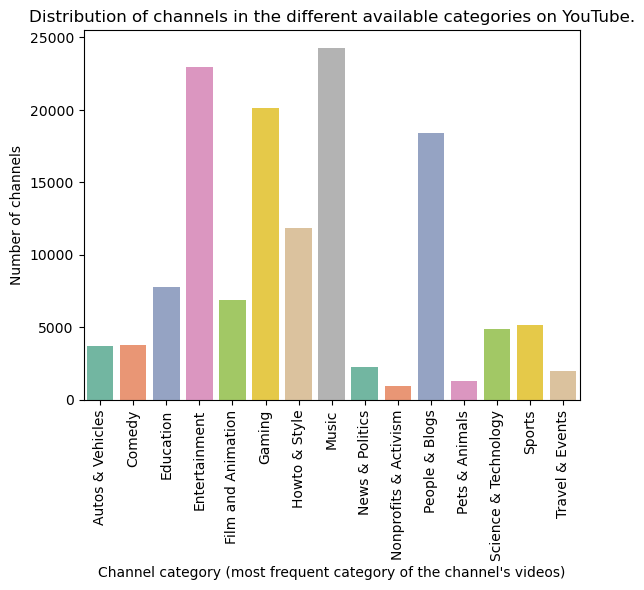

In [ ]:
channels_by_category_filepath = dataset_root_path + "../generated_data/channel_count_per_category.csv"

try:  # try to read data from file
    channels_per_category = pd.read_csv(channels_by_category_filepath)
    print("Loaded data from file")
except FileNotFoundError:  # if file does not exist, generate it and save
    channels_per_category = df_channels_clean.groupby('category_cc').agg(number_of_channels=('category_cc', 'size')).reset_index()
    channels_per_category.to_csv(channels_by_category_filepath, index=False)

display(channels_per_category)


ax = sns.barplot(x="category_cc", y="number_of_channels", data=channels_per_category,hue="category_cc", palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of channels in the different available categories on YouTube.")
plt.xlabel("Channel category (most frequent category of the channel's videos)")
plt.ylabel("Number of channels")
plt.show()

 
One can see that the number of channels corresponding to News&Politics category is very low ! This category is even one of the smallest. What about the number of corresponding videos ?

### Distribution of video categories

Going through chunk 0...
The first 100000 entries have been processed. 72824794 left.
1.651 secs per chunk on average. Meaning  20.036 minutes left.
Going through chunk 1...
The first 200000 entries have been processed. 72724794 left.
1.451 secs per chunk on average. Meaning  17.589 minutes left.
Going through chunk 2...
The first 300000 entries have been processed. 72624794 left.
1.335 secs per chunk on average. Meaning  16.162 minutes left.
Going through chunk 3...
The first 400000 entries have been processed. 72524794 left.
1.292 secs per chunk on average. Meaning  15.614 minutes left.
Going through chunk 4...
The first 500000 entries have been processed. 72424794 left.
1.187 secs per chunk on average. Meaning  14.323 minutes left.
Going through chunk 5...
The first 600000 entries have been processed. 72324794 left.
1.343 secs per chunk on average. Meaning  16.188 minutes left.
Going through chunk 6...
The first 700000 entries have been processed. 72224794 left.
1.414 secs per chunk

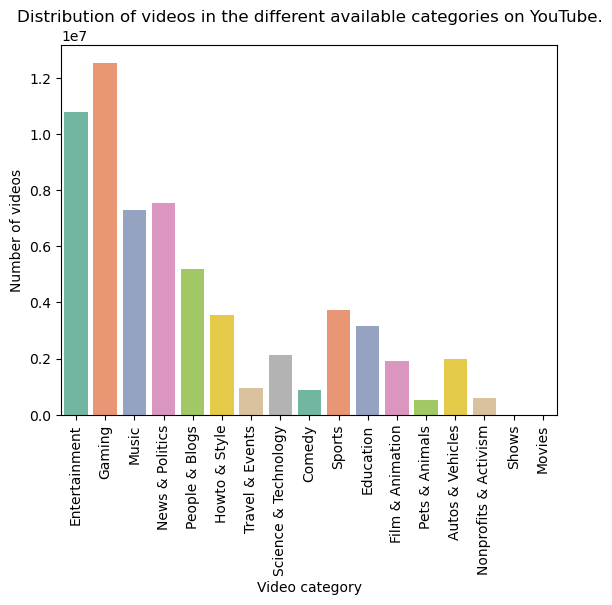

In [ ]:
#distribution categories of videos over the whole (cleaned) dataset per chunck

videos_by_category_filepath = dataset_root_path + "../generated_data/video_count_by_category.csv"

try:  # try to read the data from file
    videos_per_category_counts_total = pd.read_csv(videos_by_category_filepath)
    print("Data read from file")
except FileNotFoundError:  # otherwise, generate it and save

    # Apply the function to all chunks and get the results concatenated
    videos_per_category_counts_per_chunk = dp.run_simple_function_on_chunks_concat(
        dp.videos_in_chunks_clean(videos_clean_filepath, chunksize=100000), 
        dp.count_videos_by_category,
        print_time=(100000, 72924794)
        )

    # Sum the counts across all chunks to get the total count of videos per category
    videos_per_category_counts_total = videos_per_category_counts_per_chunk.sum().to_frame(name='total_count').reset_index()
    videos_per_category_counts_total.columns = ['category', 'total_count']

    videos_per_category_counts_total.to_csv(videos_by_category_filepath,)  # save the created dataframe so we don't have to generate it again


# Display the final distribution
print(videos_per_category_counts_total)

ax = sns.barplot(x="category", y="total_count", hue='category', legend=False, data=videos_per_category_counts_total, palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of videos in the different available categories on YouTube.")
plt.xlabel("Video category")
plt.ylabel("Number of videos")
plt.show()

It is apparent that there are fewer News & Politics channels compared to other categories. However, the proportion of News & Politics videos is much higher. This suggests that News & Politics followers are relatively active in posting content.

Therefore, studying News & Politics videos seems to be a worthwhile pursuit, with a large enough number of videos available, even though it will naturally not fully represent the broader YouTube community. 

In [ ]:
# delete the datasets, as we don't need them anymore

del videos_per_category_counts_total
del channels_per_category

## Reducing the datasets to our needs

### 'News & Politics' channels

In [9]:
#filter channels dataset to only include n&p

# Note: because the channel dataset is much smaller than the video dataset, we don't need to worry about chunks here
# Also, the results can be saved in a single file without a problem.

try:
    df_channels_news_pol = pd.read_csv(channels_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_news_pol = df_channels_clean[df_channels_clean.category_cc == "News & Politics"]
    df_channels_news_pol.to_csv(channels_news_pol_filepath, index=False)

#this file will be used from now on

Read data from file


In [ ]:
display(df_channels_news_pol.head())
display(df_channels_news_pol.shape)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,News & Politics,2006-08-26,UCttspZesZIDEwwpVIgoZtWQ,IndiaTV,15177282,139814,199.0,2.087
1,News & Politics,2012-06-01,UCRWFSbif-RFENbBrSiez1DA,ABP NEWS,16274836,129027,207.0,2.087
2,News & Politics,2017-03-03,UCmphdqZNmqL72WJ2uyiNw5w,ABP NEWS HINDI,10800000,51298,340.0,2.087
3,News & Politics,2015-03-23,UCx8Z14PpntdaxCt2hakbQLQ,The Lallantop,9120000,9423,438.0,2.087
4,News & Politics,2007-06-19,UCIvaYmXn910QMdemBG3v1pQ,Zee News,9280000,102648,549.0,2.087


(2263, 8)

### News & Politics videos

In [ ]:
# filter the video dataframe to only include videos from n&p category

videos_in_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol.csv"

if os.path.isfile(videos_in_news_pol_filepath):  # if the file already exists
    print("File already exists, no need to generate again.\nDelete or rename the existing file in order to regenerate it.")
else:  # if not, generate the file. The data is directly saved to a new dataframe, 
       # because it would be to big to load in memory at once
    dp.run_simple_function_on_chunks_save_csv(dp.videos_in_chunks_clean(videos_clean_filepath,chunksize=100000),
                                              lambda x: x[x.categories == "News & Politics"], 
                                              filename=videos_in_news_pol_filepath,
                                              index=False,
                                              overwrite=False,  # will not overwrite existing files
                                              every=15,  # will save to the csv every 15 chunks
                                              print_time=(100000, 72924794), video=True)
    
# a new filtered file is saved, this dataframe will be used from now on.

File already exists, no need to generate again.
Delete or rename the existing file in order to regenerate it.


In [ ]:
# load the (large) csv file that was just written, containing the videos in news and politics, in chunks, 
# and print the head of the first chunk and the shape of each chunk (this is just to show that it worked)

print("News and politics videos:\n")

total_length = 0
for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):
    
    if i == 0:
        print(f"Head of chunk 0: ")
        print(chunk[chunk.channel_id == "UCupvZG-5ko_eiXAupbDfxWw"])

        display(chunk.head())
        print("The shapes of all chunks:")
    print(f"Shape of chunk number {i}: {chunk.shape}")
    total_length += chunk.shape[0]

print(f"In total {total_length} rows, which takes up {i+1} chunks.")
del chunk

print(f"{gc.collect()} garbages collected.")

News and politics videos:

Head of chunk 0: 
Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,RetroGamer3Live StreampoliticsTrump,Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,NWOEbolaUkraineMainstreamMediaPyschology,Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media: Facebook.com/thebookoflaura Tw...,89.0,eWXefhNB2po,707,625.0,michael jacksonlyricsmusic videocourtchildrenk...,my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:10.520209,👕 Order your shirts here: https://Teespring.co...,195.0,MBgzne7djFU,378,47027.0,FunnyEntertainmentFunLaughingEducationalLearni...,Elizabeth Warren Gets a Big Surprise at the Ai...,2019-10-03 00:00:00,374711.0
4,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:16.481889,👕 Order your shirts here: https://Teespring.co...,114.0,AbH3pJnFgY8,278,36384.0,FunnyEntertainmentFunLaughingEducationalLearni...,No More Twitter? 😂,2019-10-02 00:00:00,245617.0


The shapes of all chunks:
Shape of chunk number 0: (100000, 12)
Shape of chunk number 1: (100000, 12)
Shape of chunk number 2: (100000, 12)
Shape of chunk number 3: (100000, 12)
Shape of chunk number 4: (100000, 12)
Shape of chunk number 5: (100000, 12)
Shape of chunk number 6: (100000, 12)
Shape of chunk number 7: (100000, 12)
Shape of chunk number 8: (100000, 12)
Shape of chunk number 9: (100000, 12)
Shape of chunk number 10: (100000, 12)
Shape of chunk number 11: (100000, 12)
Shape of chunk number 12: (100000, 12)
Shape of chunk number 13: (100000, 12)
Shape of chunk number 14: (100000, 12)
Shape of chunk number 15: (100000, 12)
Shape of chunk number 16: (100000, 12)
Shape of chunk number 17: (100000, 12)
Shape of chunk number 18: (100000, 12)
Shape of chunk number 19: (100000, 12)
Shape of chunk number 20: (100000, 12)
Shape of chunk number 21: (100000, 12)
Shape of chunk number 22: (100000, 12)
Shape of chunk number 23: (100000, 12)
Shape of chunk number 24: (100000, 12)
Shape of 

#### News & Politics video IDs
(In order to be able to use this without loading the entire Videos in News & Politics DataFrame) in a Series

In [ ]:
try:
    df_videos_news_pol_display_ids = pd.read_csv(videos_news_pol_display_ids_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_videos_news_pol_display_ids = dp.run_simple_function_on_chunks_concat(pd.read_csv(videos_in_news_pol_filepath, chunksize=100000, usecols=['display_id']),
                                                                                 fct = lambda df: df['display_id'],
                                                                                 print_time=True,
                                                                                 save=videos_news_pol_display_ids_filepath.replace('.csv', '')
                                                                                 )
    df_videos_news_pol_display_ids.to_csv(videos_news_pol_display_ids_filepath, index=False)

Read data from file


#### Have all the News and Politics videos been posted by a News and Politics channel ? 

In [ ]:
# check if all videos we found in news&pol are also published by a channel in category n&p

try:
    df_videos_news_pol__channel_not_news_pol = pd.read_csv(videos_news_pol__channel_not_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    # go through the large file of news and politics videos in chunks, 
    # and extract all videos which were not uploaded by a News & Politics channel

    df_videos_news_pol__channel_not_news_pol = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000),
        fct=lambda chunk: chunk[np.logical_not(chunk.channel_id.isin(df_channels_news_pol.channel))],
        print_time=True
        )

     # save the resuls to a csv
    df_videos_news_pol__channel_not_news_pol.to_csv(videos_news_pol__channel_not_news_pol_filepath, index=False)

        
display(df_videos_news_pol__channel_not_news_pol.head())
display(df_videos_news_pol__channel_not_news_pol.shape)



Read data from file


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,RetroGamer3Live StreampoliticsTrump,Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,NWOEbolaUkraineMainstreamMediaPyschology,Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media: Facebook.com/thebookoflaura Tw...,89.0,eWXefhNB2po,707,625.0,michael jacksonlyricsmusic videocourtchildrenk...,my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:01.617657,A young man is living a normal life with no ca...,16.0,ck6Yl8TNoWs,1257,452.0,JoiRidaCheathamJoiRidaCheathamAcceptedDetroitF...,Accepted - Award Winning Short Film,2013-10-13 00:00:00,27366.0
4,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:06.565138,Short Film,1.0,tjUajxZAIZ8,422,15.0,Joi.RidaCheathamjoiridacheathamdreadlocupdatej...,JoiRida Twin Visit (Introducing Jive Viper),2010-03-04 00:00:00,987.0


(541172, 12)

**We see that indeed, not all videos in the news and politics category belong to a channel in this category!** (541172 such videos, out of 7551328 in total in News & Politics, see output a few cells above)
A google search shows that apparently, you don't have to have the same category for all videos, but you set a "default" channel category which will be used for videos if you don't change it manually. Also, you can probably change the default category after a while if you want.

This is the reason why most of the news&pol videos are uploaded by a news&pol channel, but not all.

In the paper about the YouNiverse dataset, the authors say that the channel category is actually the "most frequent category". We believe that the video categories are the most relevant, as they are the 'true' categories of the content.

In [ ]:
del df_videos_news_pol__channel_not_news_pol
print(gc.collect())

0


### Comments under News and Politics videos

In [ ]:
comments_news_pol_videos_filepath = dataset_root_path + "../generated_data/comments_news_pol_videos.csv"

if os.path.isfile(comments_news_pol_videos_filepath):
    print("File already exists, no need to generate again.")
else:

    # get all the comments made on a video in the News&Pol category
    dp.run_simple_function_on_chunks_save_csv(
        dp.comments_in_chunks(chunksize=1000000), 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_display_ids.display_id)],
        comments_news_pol_videos_filepath,
        index=False,
        every=30,
        print_time=(1000000, 8600000000),)


File already exists, no need to generate again.


## CNN, ABC, BBC, AJE and FOX

### Extracting News and Politics videos published by the 5 main News and Politics channels

In [11]:
# define variables for the channel ids of CNN, ABC, BBC, Al Jazeera English and Fox
channel_id_cnn = "UCupvZG-5ko_eiXAupbDfxWw"  # CNN
channel_id_abc = "UCBi2mrWuNuyYy4gbM6fU18Q"  # ABC News
channel_id_bbc = "UC16niRr50-MSBwiO3YDb3RA"  # BBC News
channel_id_aje = "UCNye-wNBqNL5ZzHSJj3l8Bg"  # Al Jazeera English
channel_id_fox = "UCXIJgqnII2ZOINSWNOGFThA"  # Fox News

selected_channel_ids = [channel_id_cnn,
                        channel_id_abc,
                        channel_id_bbc,
                        channel_id_aje,
                        channel_id_fox]


In [ ]:
# form the filtered N&P videos dataframe, keep those posted by channels manually selected (here CNN, ABC News, BBC News, Al Jazeera English and Fox News)

videos_news_pol_manual_selection_filepath = dataset_root_path + "../generated_data/videos_from_news_pol_from_selected_channels.csv"

try:
    df_videos_news_pol_manually_selected = pd.read_csv(videos_news_pol_manual_selection_filepath)
    print("Read data from file")
except FileNotFoundError:
   # go through the large file with videos in news and politics, 
   # and select those videos which are uploaded by one of our selected channels
    
    df_videos_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000), 
        fct=lambda chunk: chunk[chunk.channel_id.isin(selected_channel_ids)],
        print_time=False)
    
    # save the results to a csv
    df_videos_news_pol_manually_selected.to_csv(videos_news_pol_manual_selection_filepath, index=False)

display(df_videos_news_pol_manually_selected.head())
display(df_videos_news_pol_manually_selected.shape)


#checking if all channels are here and have videos
channel_ids = df_videos_news_pol_manually_selected.channel_id.unique()
print(channel_ids)

Read data from file


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:52.312339,God's not Dead' now available on DVD Watch the...,3.0,Tu8LeamtOmc,252,6.0,Fox FriendsClayton MorrisFamous FacesFaithGenr...,'Duck Dynasty' stars talk faith in entertainment,2014-12-29 00:00:00,344.0
1,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:55.983188,Shocking new tape reveals 15-year-old woman di...,2.0,a9RXcMkahu8,347,11.0,Bill OreillyOreilly FactorPersonal FreedomsVal...,Planned Parenthood Controversy,2014-12-29 00:00:00,1057.0
2,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:01.107518,Watters asks the folks of Cambridge Massachuse...,89.0,KrQu5grf5v8,277,1958.0,Oreilly FactorBill OreillyJesse WattersWatters...,Watters' World: Free stuff edition,2014-12-29 00:00:00,244169.0
3,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:07.440358,New Pew poll shows 44 percent say they are not...,6.0,CVzmKWI2OXQ,283,12.0,Bill OreillyCharles KrauthammerOreilly FactorP...,What happened to patriotism?,2014-12-29 00:00:00,798.0
4,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:50.948588,Jesse Watters ventures into the National Organ...,12.0,J9A7_Gjjzzg,294,448.0,Oreilly FactorBill OreillyJesse WattersWatters...,Watters' World: NOW edition,2014-12-29 00:00:00,43412.0


(162278, 12)

['UCXIJgqnII2ZOINSWNOGFThA' 'UCNye-wNBqNL5ZzHSJj3l8Bg'
 'UCBi2mrWuNuyYy4gbM6fU18Q' 'UCupvZG-5ko_eiXAupbDfxWw'
 'UC16niRr50-MSBwiO3YDb3RA']


Splitting the extracted videos into 5 dataframes

In [ ]:
# filter the video dataset to get only videos from each of our selected channels

channels = {
    'cnn': ('channel_id_cnn', 'cnn'),
    'abc': ('channel_id_abc', 'abc'),
    'bbc': ('channel_id_bbc', 'bbc'),
    'aje': ('channel_id_aje', 'aje'),
    'fox': ('channel_id_fox', 'fox')
}

# Load or filter data for each channel
df_videos_news_pol_cnn = dp.filter_channel_data(dataset_root_path, df_videos_news_pol_manually_selected, 'channel_id_cnn', 'CNN', 'cnn')
df_videos_news_pol_abc = dp.filter_channel_data(dataset_root_path, df_videos_news_pol_manually_selected, 'channel_id_abc', 'ABC News', 'abc')
df_videos_news_pol_bbc = dp.filter_channel_data(dataset_root_path, df_videos_news_pol_manually_selected, 'channel_id_bbc', 'BBC News', 'bbc')
df_videos_news_pol_aje = dp.filter_channel_data(dataset_root_path, df_videos_news_pol_manually_selected, 'channel_id_aje', 'Al Jazeera English', 'aje')
df_videos_news_pol_fox = dp.filter_channel_data(dataset_root_path, df_videos_news_pol_manually_selected, 'channel_id_fox', 'Fox News', 'fox')


Data for CNN read from file.
Data for ABC News read from file.
Data for BBC News read from file.
Data for Al Jazeera English read from file.
Data for Fox News read from file.


### Extracting the comments made under their videos

In [ ]:
# get comments on (n&p) videos from our selected channels using the ids from filtered video dataset from the selected channels
# Check if all 5 channels are in the video dataset before filtering

comments_news_pol_selected_channels_filepath = dataset_root_path + "../generated_data/comments_news_pol_selected_channels.csv"

try:
    df_comments_news_pol_manually_selected = pd.read_csv(comments_news_pol_selected_channels_filepath) 

    print("Read data from file")
except FileNotFoundError:
    # get all the comments made on a video uploaded by one of our selected channels
    df_comments_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # only go through news and pol videos 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_manually_selected.display_id)],
        print_time=(1000000, 8600000000))
    
     # merge it with the video data of the selected channels, to get the channel id directly in the comment df
    df_comments_news_pol_manually_selected = df_comments_news_pol_manually_selected.merge(
        df_videos_news_pol_manually_selected[["display_id", "channel_id"]], 
        left_on="video_id", right_on="display_id")
    # save as csv
    df_comments_news_pol_manually_selected.to_csv(comments_news_pol_selected_channels_filepath, index=False)

Read data from file


In [ ]:
display(df_comments_news_pol_manually_selected)
display(df_comments_news_pol_manually_selected.shape)

#checking if all channels are here and have videos
channel_ids = df_comments_news_pol_manually_selected.channel_id.unique()
print(channel_ids)

,author,video_id,likes,replies,display_id,channel_id
0,30,HqBtIWFW-0k,2,2,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
1,30,HqBtIWFW-0k,0,0,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
2,269,anah_4blbyU,0,0,anah_4blbyU,UCupvZG-5ko_eiXAupbDfxWw
3,269,vtVvnL5SbDA,3,0,vtVvnL5SbDA,UCBi2mrWuNuyYy4gbM6fU18Q
4,336,IC1gAi0BmhM,0,0,IC1gAi0BmhM,UCBi2mrWuNuyYy4gbM6fU18Q
...,...,...,...,...,...,...
48822750,576551809,VUUbyaQYxU4,2,0,VUUbyaQYxU4,UCBi2mrWuNuyYy4gbM6fU18Q
48822751,576551877,x_dK7Y07LSs,1,0,x_dK7Y07LSs,UCXIJgqnII2ZOINSWNOGFThA
48822752,576551877,W6ZHY0E4_Wg,0,0,W6ZHY0E4_Wg,UC16niRr50-MSBwiO3YDb3RA
48822753,576551877,rfLBvU8sSWw,14,2,rfLBvU8sSWw,UC16niRr50-MSBwiO3YDb3RA


(48822755, 6)

['UCBi2mrWuNuyYy4gbM6fU18Q' 'UCupvZG-5ko_eiXAupbDfxWw'
 'UC16niRr50-MSBwiO3YDb3RA' 'UCXIJgqnII2ZOINSWNOGFThA'
 'UCNye-wNBqNL5ZzHSJj3l8Bg']


Split the comments into the 5 main channels

In [5]:
# define the file paths for the files for comments from each of the channels

comments_news_pol_selected_channels_filepaths = [
    dataset_root_path + "../generated_data/comments_news_pol_" + channel + ".csv" 
    for channel in ["cnn", "abc","bbc", "aje", "fox"]  
    ]

# check if all of the files already exist
if np.all([os.path.isfile(filepath) for filepath in comments_news_pol_selected_channels_filepaths]):
    df_comments_news_pol_cnn = pd.read_csv(comments_news_pol_selected_channels_filepaths[0])
    df_comments_news_pol_abc = pd.read_csv(comments_news_pol_selected_channels_filepaths[1])
    df_comments_news_pol_bbc = pd.read_csv(comments_news_pol_selected_channels_filepaths[2])
    df_comments_news_pol_aje = pd.read_csv(comments_news_pol_selected_channels_filepaths[3])
    df_comments_news_pol_fox = pd.read_csv(comments_news_pol_selected_channels_filepaths[4])
    print("Read 5 dfs from file")
else:
    # group the comments by channel
    df_comments_news_pol_manually_selected_grouped = df_comments_news_pol_manually_selected.groupby("channel_id")
    
    # save the groups to new dfs
    (df_comments_news_pol_cnn,
     df_comments_news_pol_abc,
     df_comments_news_pol_bbc,
     df_comments_news_pol_aje,
     df_comments_news_pol_fox) = (df_comments_news_pol_manually_selected_grouped.get_group(channel_id ) 
                                  for channel_id in [channel_id_cnn,
                                                     channel_id_abc,
                                                     channel_id_bbc,
                                                     channel_id_aje,
                                                     channel_id_fox])
    
    # save the new dfs to csv
    df_comments_news_pol_cnn.to_csv(comments_news_pol_selected_channels_filepaths[0], index=False)
    df_comments_news_pol_abc.to_csv(comments_news_pol_selected_channels_filepaths[1], index=False)
    df_comments_news_pol_bbc.to_csv(comments_news_pol_selected_channels_filepaths[2], index=False)
    df_comments_news_pol_aje.to_csv(comments_news_pol_selected_channels_filepaths[3], index=False)
    df_comments_news_pol_fox.to_csv(comments_news_pol_selected_channels_filepaths[4], index=False)

Read 5 dfs from file


### Isolating the users that commented under their videos

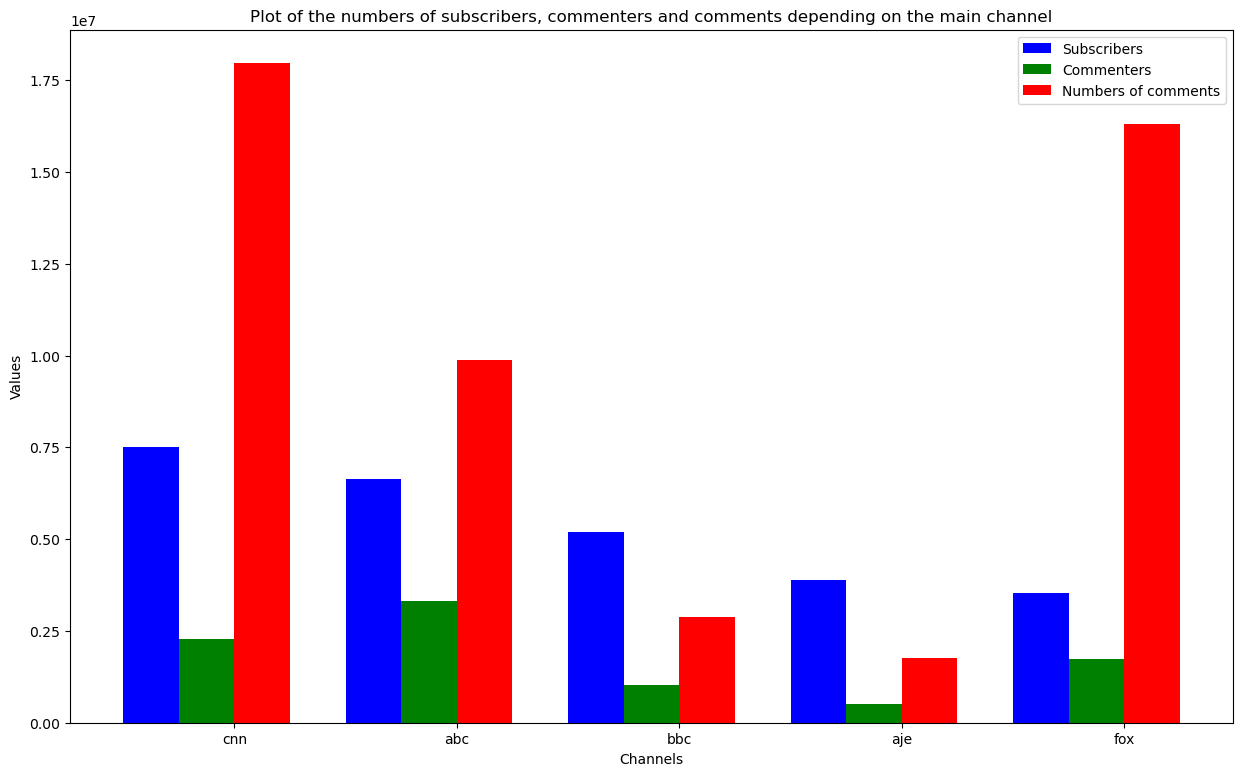

In [12]:
channels = ['cnn', 'abc', 'bbc', 
                'aje', 'fox']
#total numbers of comments
comments = [len(df_comments_news_pol_cnn), 
            len(df_comments_news_pol_abc), 
            len(df_comments_news_pol_bbc), 
            len(df_comments_news_pol_aje), 
            len(df_comments_news_pol_fox)]
#total numbers of subscribers
subscribers = [df_channels_news_pol[df_channels_news_pol.channel == channel_id_cnn].subscribers_cc.values[0], 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_abc].subscribers_cc.values[0],
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_bbc].subscribers_cc.values[0], 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_aje].subscribers_cc.values[0], 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_fox].subscribers_cc.values[0]]
# Calculate the number of unique authors that commented for each dataframe
commenters = [
    df_comments_news_pol_cnn['author'].nunique(),
    df_comments_news_pol_abc['author'].nunique(),
    df_comments_news_pol_bbc['author'].nunique(),
    df_comments_news_pol_aje['author'].nunique(),
    df_comments_news_pol_fox['author'].nunique()
]

# Bar width
bar_width = 0.25
index = np.arange(len(channels))

# Fig
fig, ax = plt.subplots(figsize=(15, 9))

bar1 = ax.bar(index - bar_width, subscribers, bar_width, label='Subscribers', color='blue')
bar2 = ax.bar(index, commenters, bar_width, label='Commenters', color='green')
bar3 = ax.bar(index + bar_width, comments, bar_width, label='Numbers of comments', color='red')

# Labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Values')
ax.set_title('Plot of the numbers of subscribers, commenters and comments depending on the main channel')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(channels)

# Legend display
ax.legend()

plt.show()


### Commenting statistics

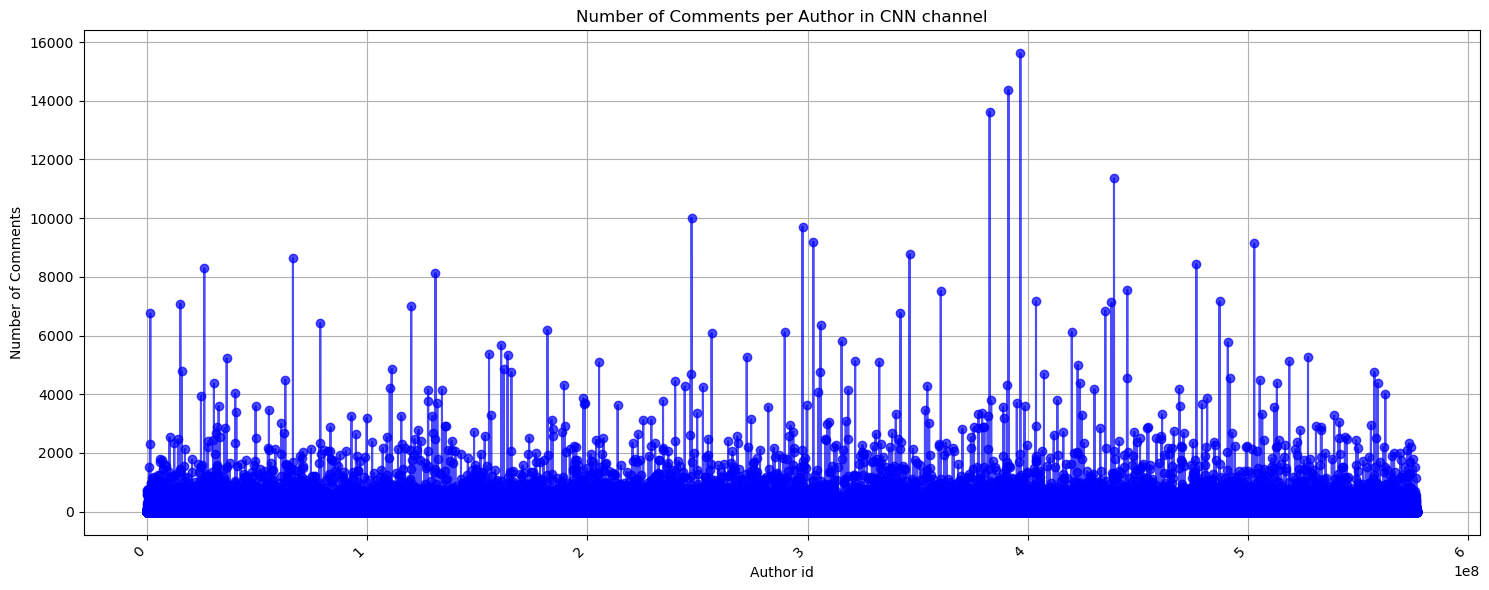

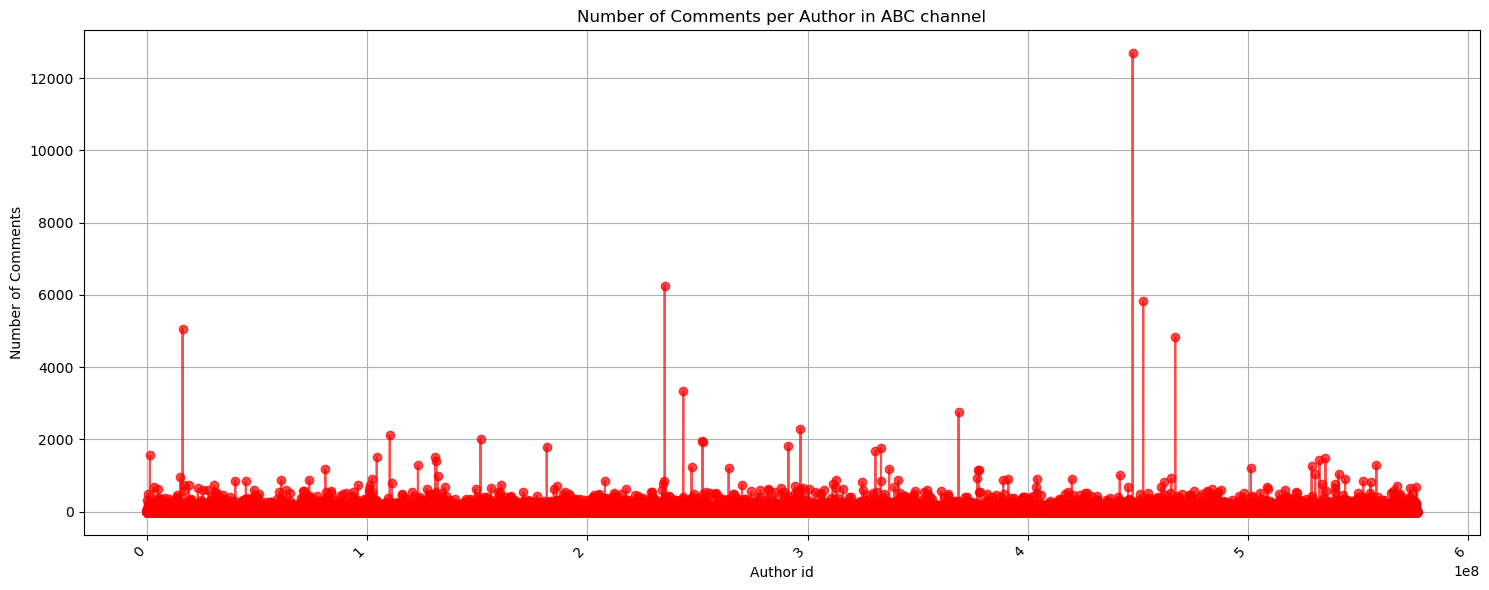

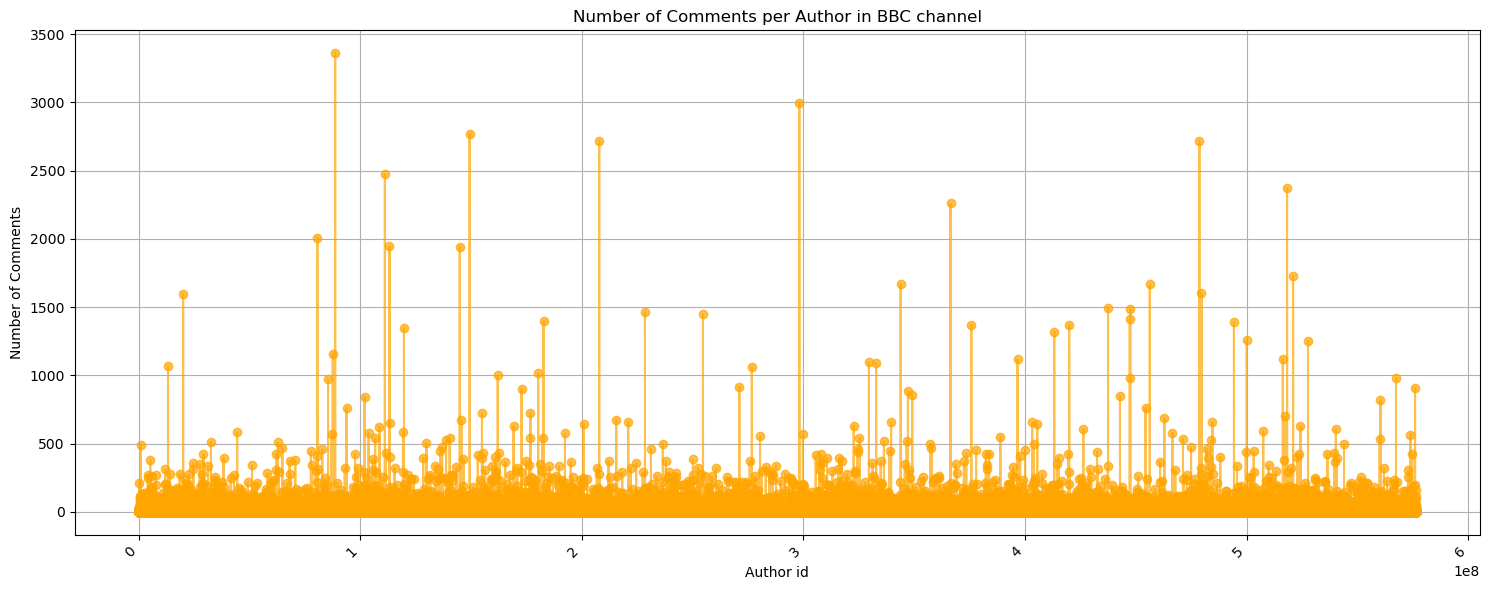

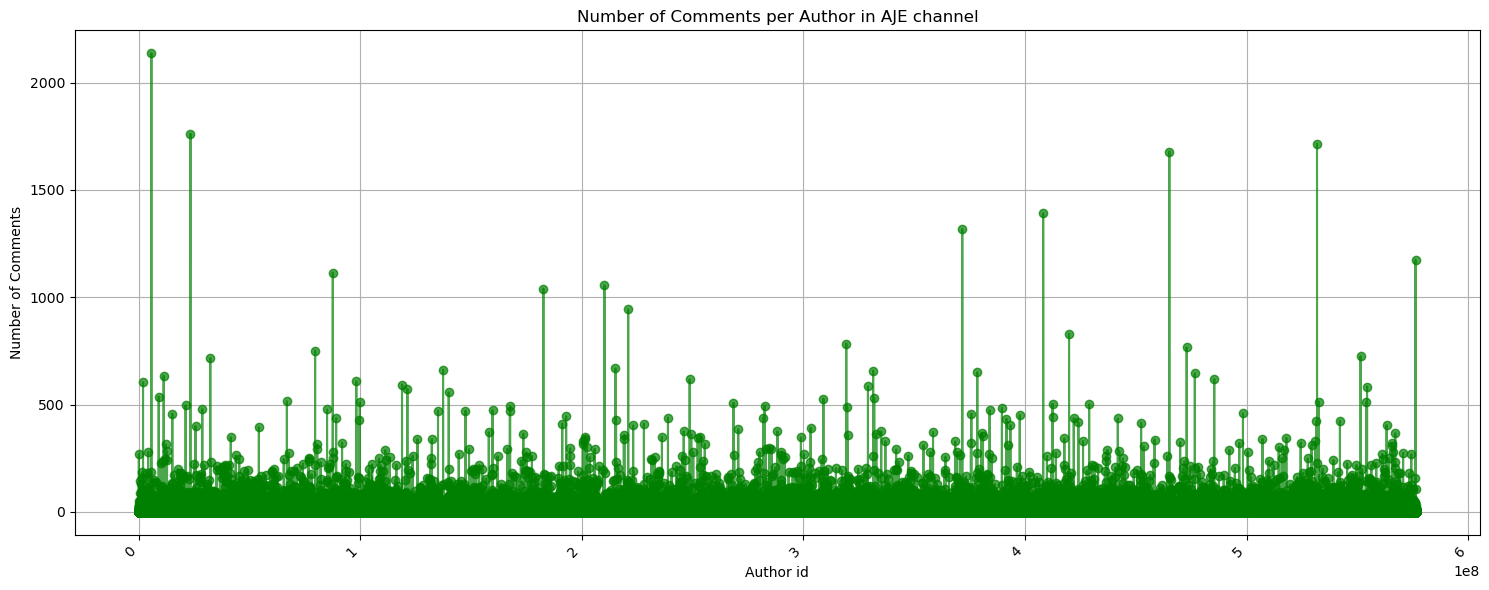

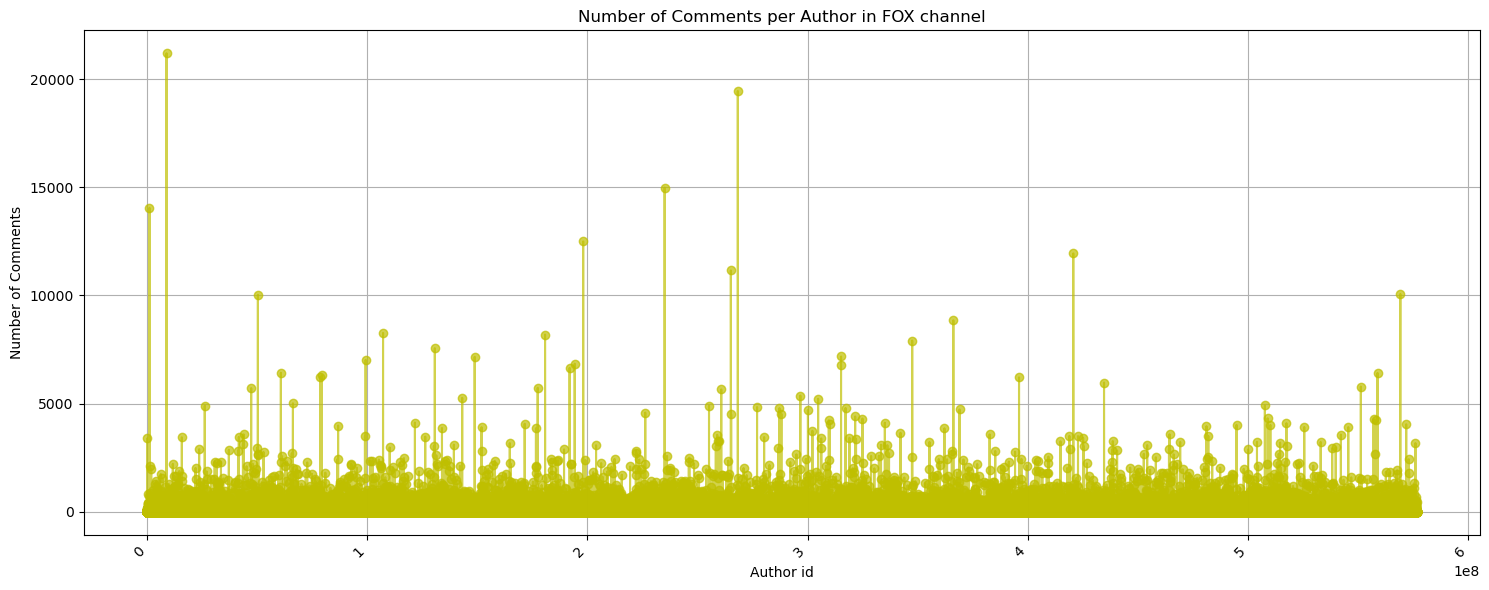

In [ ]:
# Grouping by author to get the number of comments per author for each channel
comment_counts_cnn = df_comments_news_pol_cnn.groupby('author').size()
comment_counts_abc = df_comments_news_pol_abc.groupby('author').size()
comment_counts_bbc = df_comments_news_pol_bbc.groupby('author').size()
comment_counts_aje = df_comments_news_pol_aje.groupby('author').size()
comment_counts_fox = df_comments_news_pol_fox.groupby('author').size()



dp.plot_dist_comment(comment_counts_cnn, 'CNN','b')
dp.plot_dist_comment(comment_counts_abc, 'ABC','r')
dp.plot_dist_comment(comment_counts_bbc, 'BBC','orange')
dp.plot_dist_comment(comment_counts_aje, 'AJE','g')
dp.plot_dist_comment(comment_counts_fox, 'FOX','y')

The distribution of comments per author is extremely broad, with most users writing few comments while some individuals have extraordinarily high comment volumes. Fox News stands out with users who have commented over 20,000 times, while CNN and AJE also have highly active isolated users, albeit with somewhat lower maximal comment values compared to Fox News.

Comments distribution

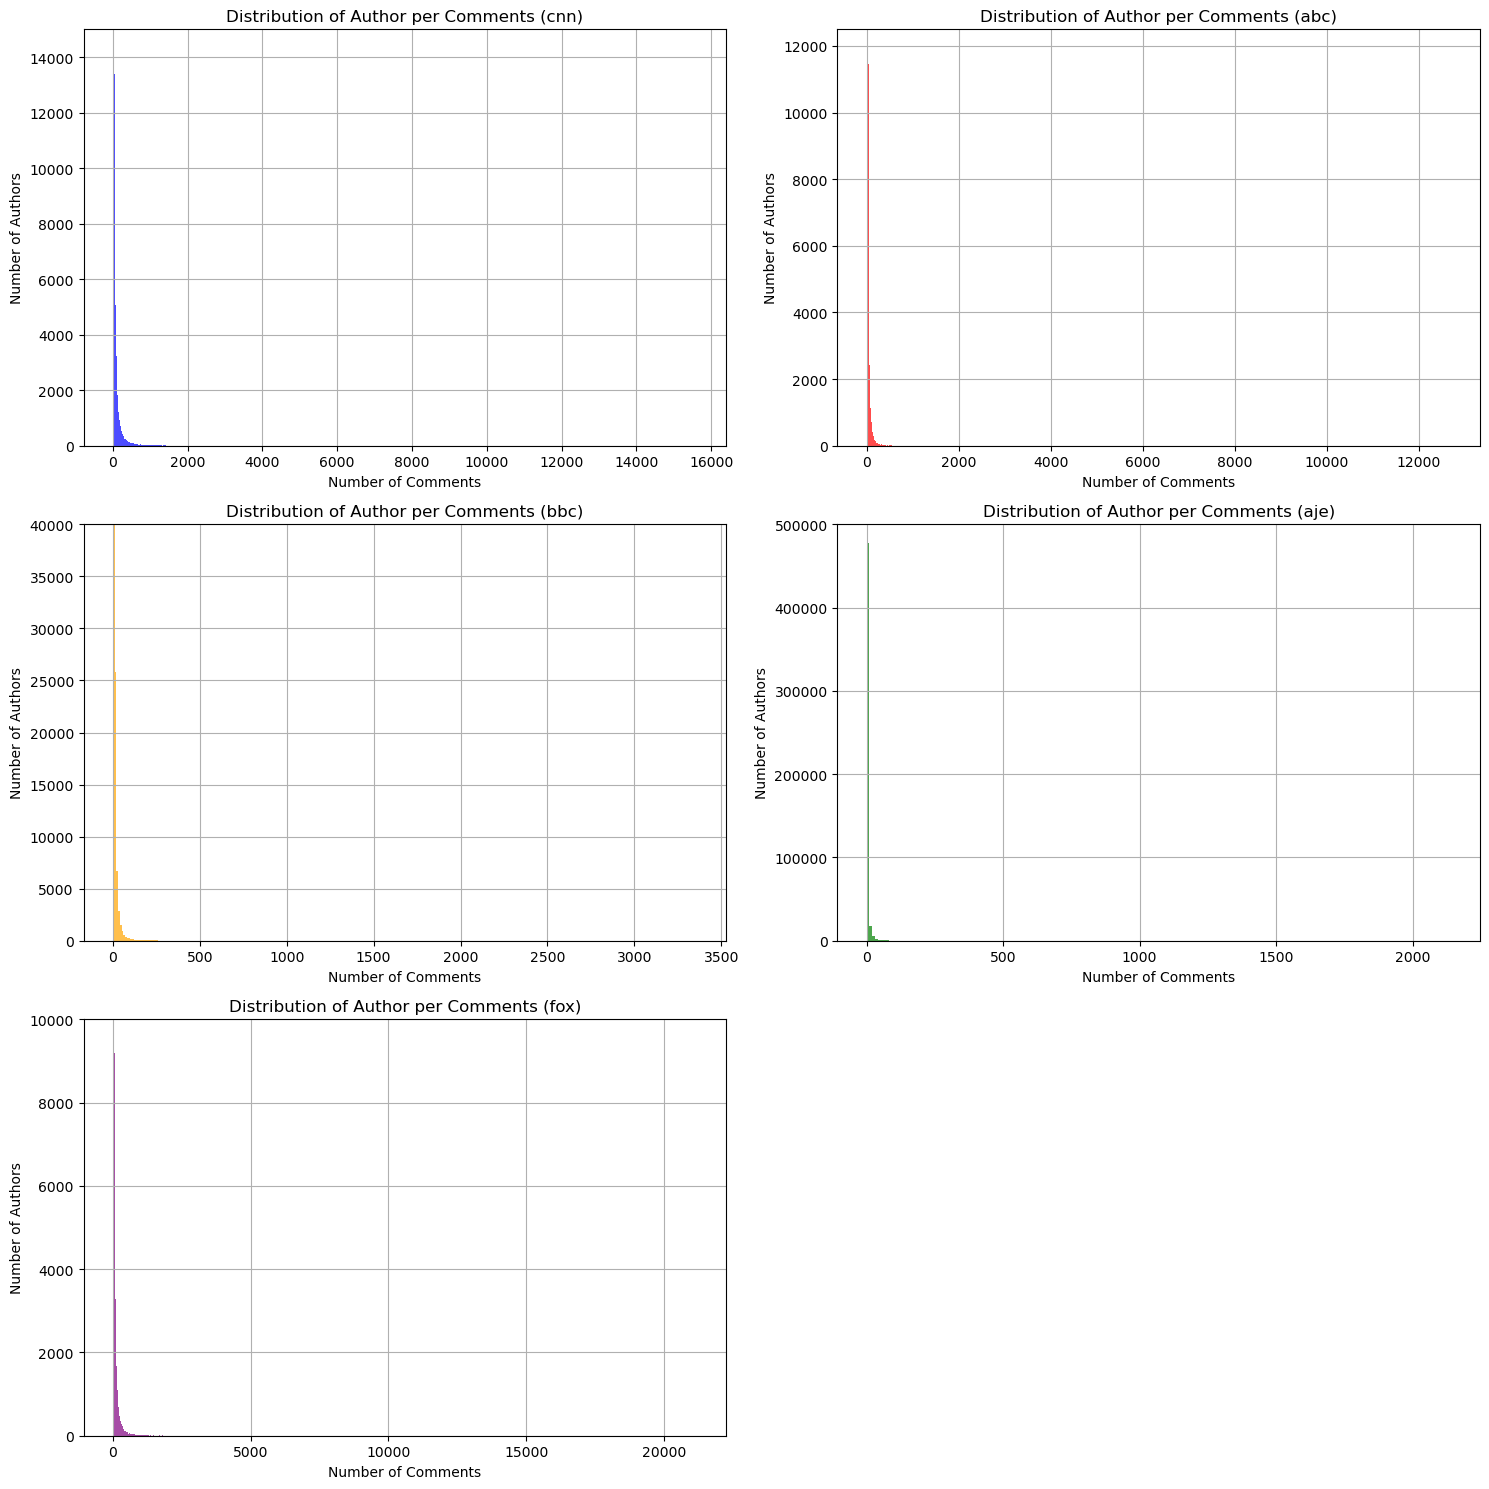

In [ ]:
data = [
    (comment_counts_cnn, 'cnn'),
    (comment_counts_abc, 'abc'),
    (comment_counts_bbc, 'bbc'),
    (comment_counts_aje, 'aje'),
    (comment_counts_fox, 'fox')
]
titles = ['cnn', 'abc', 'bbc', 'aje', 'fox']
colors = ['blue', 'red', 'orange', 'green', 'purple']
ylims = [15000, 12500, 40000, 500000, 10000]

#plot histo in 'normal' scale
dp.plot_histo_subplot(data, titles, colors, ylims, 2)
    

All the channels exhibit highly skewed distributions, with the key distinction being the range of comment counts across each channel. AJE seems to be the channel with the most users that write a small numbers of comments, and Fox the lowest of such commenters. What stands out in these distributions is that they all have a "long tail", meaning that there exist users posting significantly more comments than the very large majority of users. This suggests that the more active authors can be identified as distinct clusters based on their comment volume.
One can see that Fox users tend to be way more active then others !!


For better visualization, we will plot in log scale :

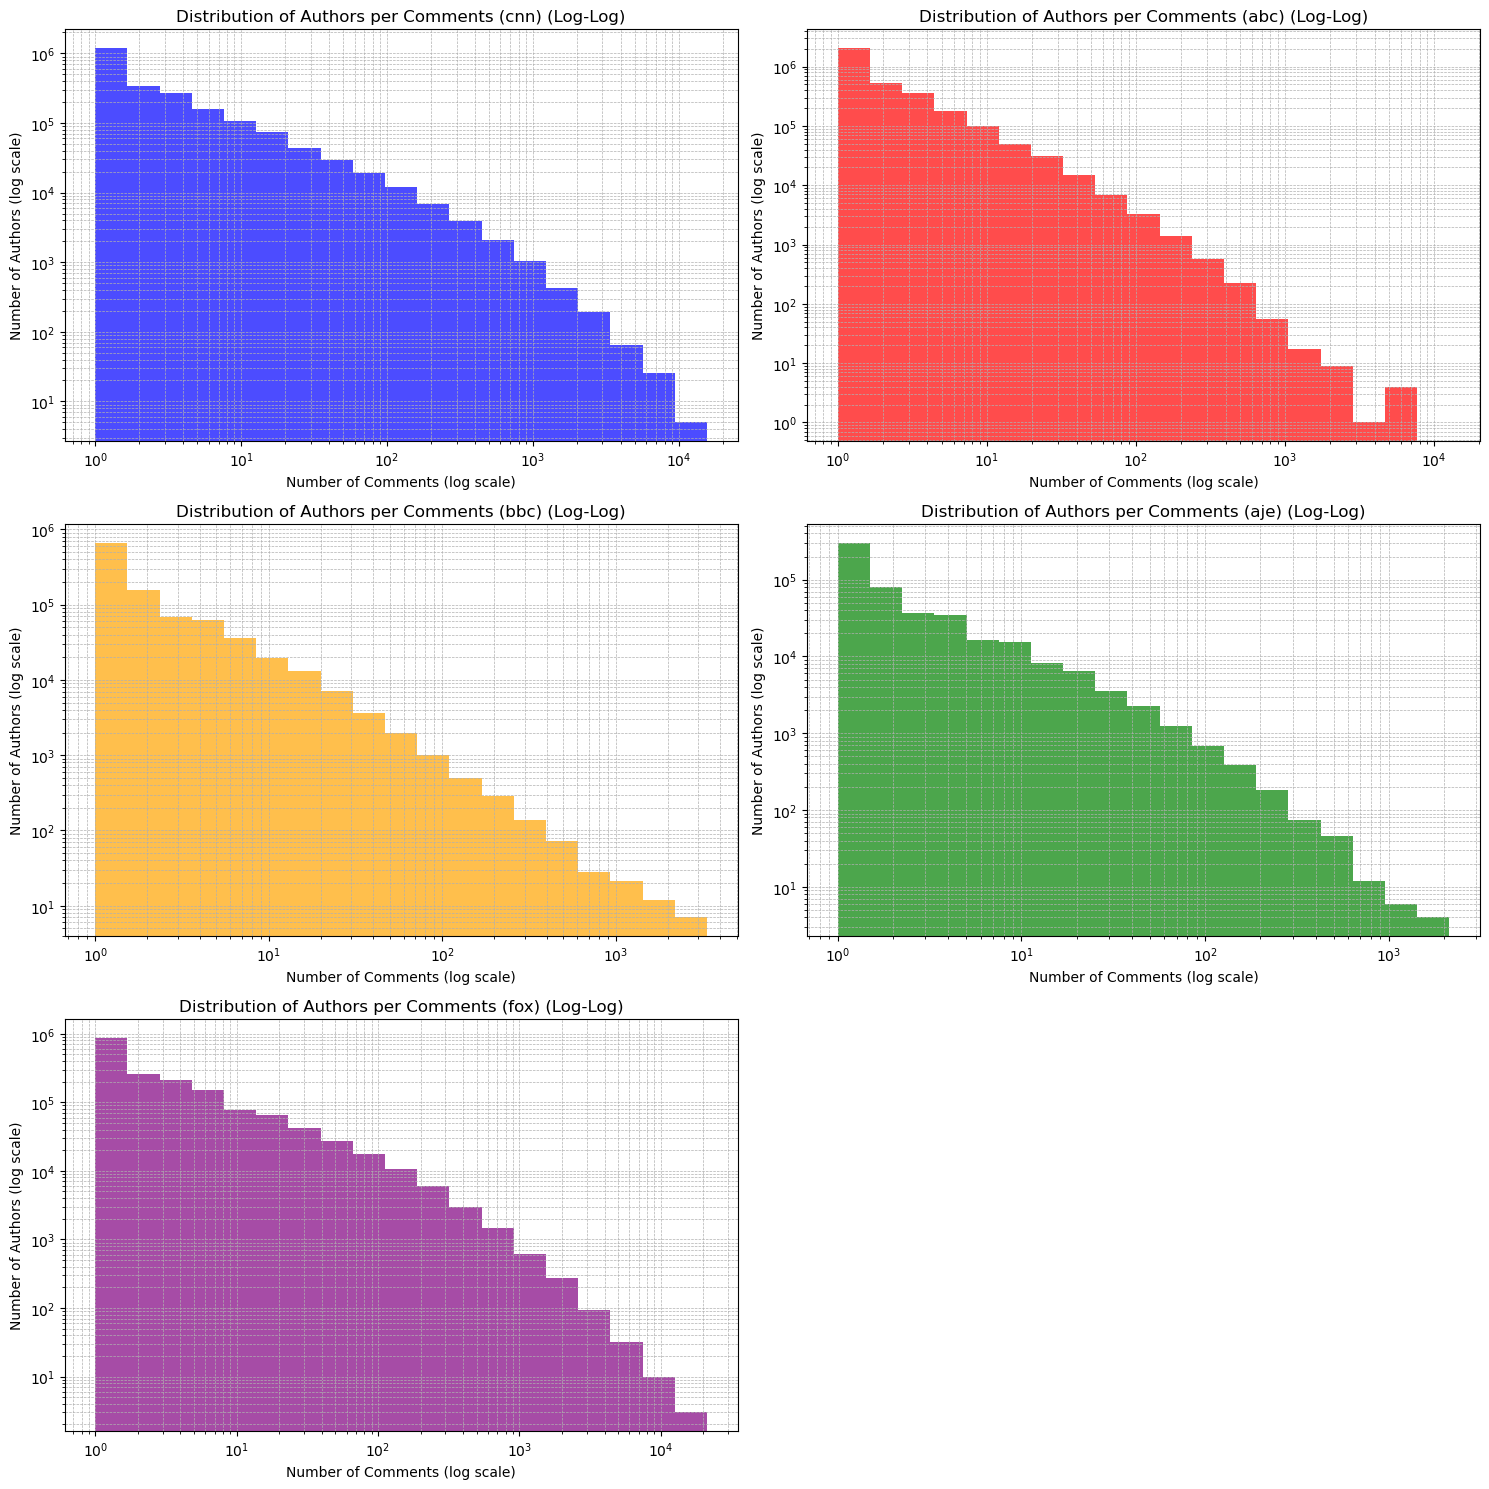

In [ ]:
#For each channel
#plot histo in log scale (utils function)
dp.plot_log_histo_subplot(data, titles, colors, 2)


These plots seem to indicate that the distribution is a power law, as the lines in the log log plots are (to a varying degree) close to a straight line! Further analysis should be done to prove this.